In [3]:
import requests

# Replace YOUR_API_KEY with your actual API key
api_key = 'ffd2c924cd8b9091d191401cd3717dca'

# Sample API call to get weather data for a specific city
city_name = 'London'
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
url = f"{base_url}{city_name}&appid={api_key}"

response = requests.get(url)
data = response.json()

# Sample output
print(data)




{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 292.56, 'feels_like': 292.91, 'temp_min': 290.64, 'temp_max': 293.71, 'pressure': 1002, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 240, 'gust': 11.32}, 'clouds': {'all': 100}, 'dt': 1690449854, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1690431369, 'sunset': 1690487857}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


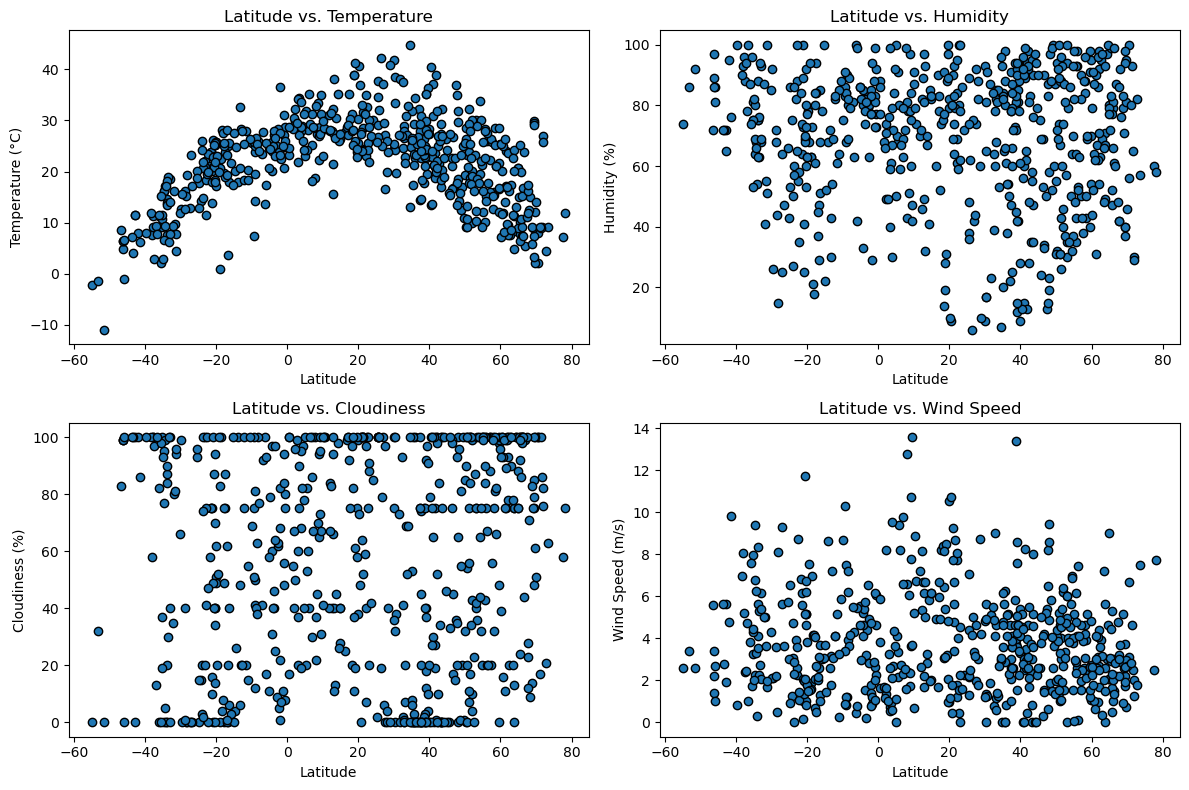

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Read the CSV data
data = pd.read_csv("cities.csv")

# Set up the OpenWeatherMap API
base_url = "https://api.openweathermap.org/data/2.5/weather"
api_key = "ffd2c924cd8b9091d191401cd3717dca"

# Lists to store weather data
temperatures = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through each city and retrieve weather data
for index, row in data.iterrows():
    lat = row["Lat"]
    lon = row["Lng"]
    
    try:
        # Make API request
        params = {
            "lat": lat,
            "lon": lon,
            "appid": api_key,
            "units": "metric"  # Use "imperial" for Fahrenheit
        }
        response = requests.get(base_url, params=params).json()
        
        # Extract and store weather data
        temperatures.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
    except Exception as e:
        # Handle API request errors
        print(f"Error fetching data for city {row['City']}: {e}")

# Create scatter plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(data["Lat"], temperatures, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.title("Latitude vs. Temperature")

plt.subplot(2, 2, 2)
plt.scatter(data["Lat"], humidity, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")

plt.subplot(2, 2, 3)
plt.scatter(data["Lat"], cloudiness, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

plt.subplot(2, 2, 4)
plt.scatter(data["Lat"], wind_speed, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

plt.tight_layout()
plt.show()


r-value for Northern Hemisphere: -0.62

r-value for Northern Hemisphere: 0.00

r-value for Northern Hemisphere: 0.05

r-value for Northern Hemisphere: -0.18

r-value for Southern Hemisphere: 0.78

r-value for Southern Hemisphere: -0.04

r-value for Southern Hemisphere: -0.13

r-value for Southern Hemisphere: -0.07



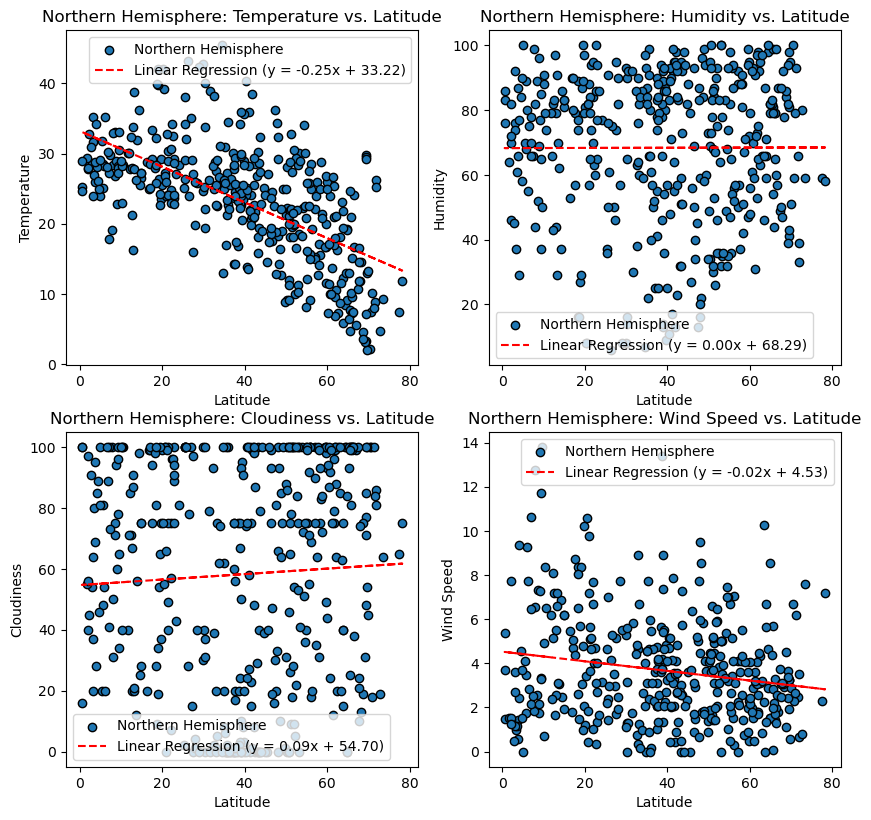

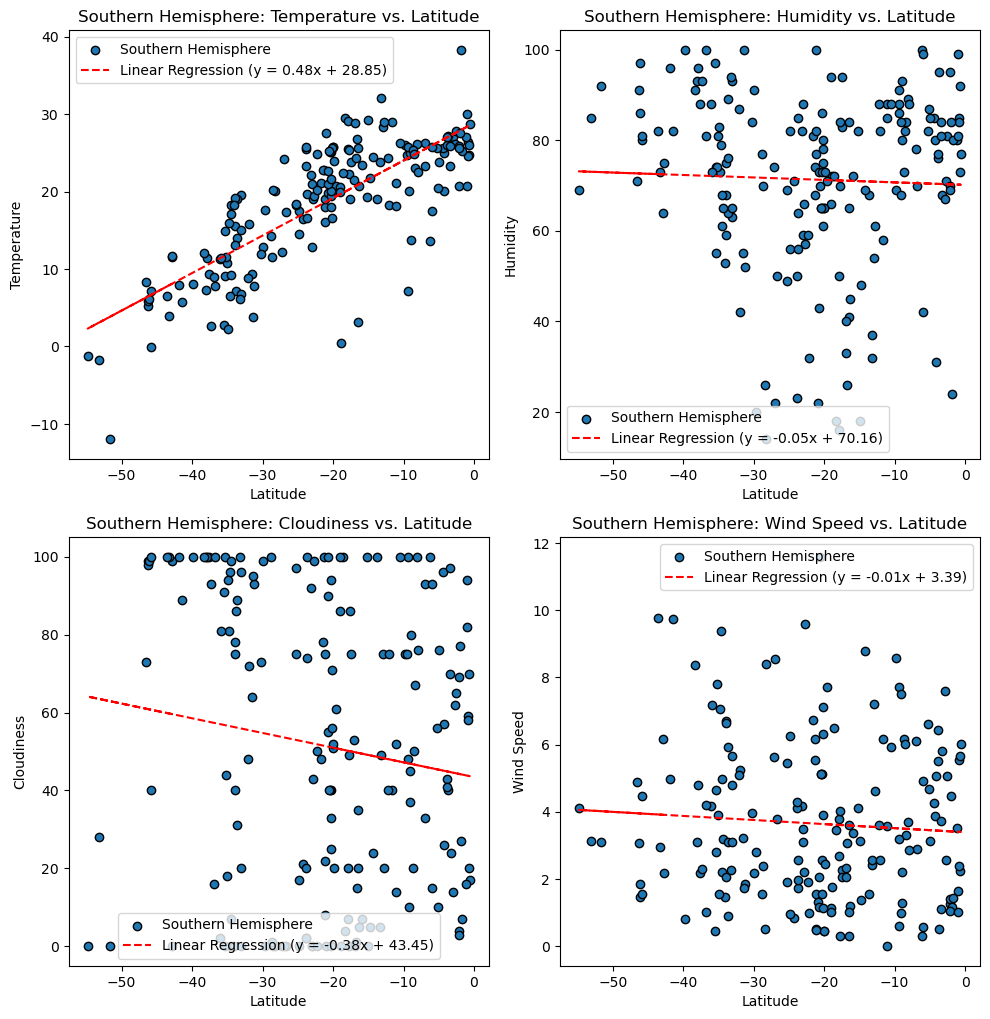

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress

# Read the CSV data
data = pd.read_csv("cities.csv")

# Set up the OpenWeatherMap API
base_url = "https://api.openweathermap.org/data/2.5/weather"
api_key = "ffd2c924cd8b9091d191401cd3717dca"

# Function for Linear Regression
def perform_linear_regression(x, y, hemisphere_name, weather_variable):
    slope, intercept, r_value, _, _ = linregress(x, y)
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x, y, edgecolors="black", label=hemisphere_name)
    plt.plot(x, x * slope + intercept, color="red", linestyle="--", label=f"Linear Regression ({equation})")
    
    plt.xlabel("Latitude")
    plt.ylabel(weather_variable)
    plt.title(f"{hemisphere_name}: {weather_variable} vs. Latitude")
    plt.legend()
    
    return r_value

# Lists to store weather data
temperatures = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through each city and retrieve weather data
for index, row in data.iterrows():
    lat = row["Lat"]
    lon = row["Lng"]
    
    try:
        # Make API request
        params = {
            "lat": lat,
            "lon": lon,
            "appid": api_key,
            "units": "metric"
        }
        response = requests.get(base_url, params=params).json()
        
        # Extract and store weather data
        temperatures.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
    except Exception as e:
        # Handle API request errors
        print(f"Error fetching data for city {row['City']}: {e}")

# Add weather data to the DataFrame
data["Temperature"] = temperatures
data["Humidity"] = humidity
data["Cloudiness"] = cloudiness
data["Wind Speed"] = wind_speed

# Separate data into Northern and Southern Hemisphere
northern_data = data[data["Lat"] >= 0]
southern_data = data[data["Lat"] < 0]

# Create separate plots for each pair of relationships
variables = ["Temperature", "Humidity", "Cloudiness", "Wind Speed"]
hemispheres = [northern_data, southern_data]
hemisphere_names = ["Northern Hemisphere", "Southern Hemisphere"]

plt.figure(figsize=(10, 20))

for i, variable in enumerate(variables):
    plt.subplot(4, 2, i + 1)
    
    # Northern Hemisphere
    x_northern = northern_data["Lat"]
    y_northern = northern_data[variable]
    r_value_northern = perform_linear_regression(x_northern, y_northern, hemisphere_names[0], variable)
    print(f"r-value for {hemisphere_names[0]}: {r_value_northern:.2f}\n")

plt.figure(figsize=(10, 20))

for i, variable in enumerate(variables):
    plt.subplot(4, 2, i + 1)
    
    # Southern Hemisphere
    x_southern = southern_data["Lat"]
    y_southern = southern_data[variable]
    r_value_southern = perform_linear_regression(x_southern, y_southern, hemisphere_names[1], variable)
    print(f"r-value for {hemisphere_names[1]}: {r_value_southern:.2f}\n")

plt.tight_layout()
plt.show()
